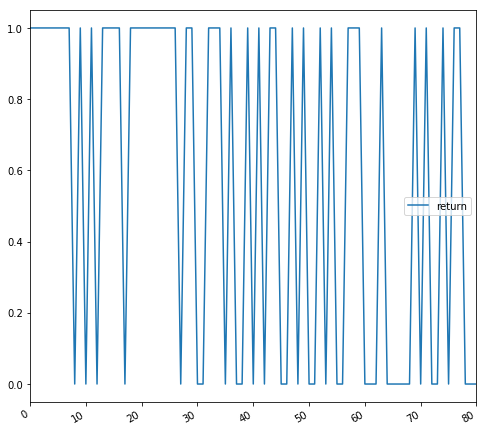

,Date,return
0,2017-01-03,True
1,2017-01-04,True
2,2017-01-05,True
3,2017-01-06,True
4,2017-01-09,True
5,2017-01-10,True
6,2017-01-11,True
7,2017-01-12,True
8,2017-01-13,False
9,2017-01-17,True


In [1]:
from pandas_datareader import data
import matplotlib.pyplot as plt
import datetime as dt


data1 = data.DataReader("AAPL",'yahoo' , dt.datetime(2017,1,1),dt.datetime(2017,6,30))[['Close','Open']] #yyyy/mm/dd

data1['return']=(data1['Close']-data1['Open'])/data1['Open']
data2 = data1.reset_index()
data2 = data2.drop('Close',axis=1)
data2 = data2.drop('Open',axis=1)
data2 = data2.set_index('Date')
data3 = data2['return'] >0
data3 = data3.reset_index()

data3.plot(subplots = True, figsize = (8, 8)); #changed
plt.show()

data3

<class 'pandas.core.frame.DataFrame'>


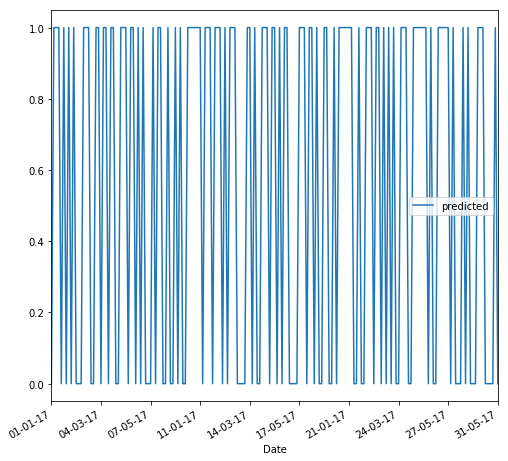

,Date,predicted
0,2017-01-01,False
1,2017-01-02,True
2,2017-01-03,True
3,2017-01-04,True
4,2017-01-05,False
5,2017-01-06,True
6,2017-02-01,False
7,2017-02-02,True
8,2017-02-03,False
9,2017-02-04,True


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

x = pd.read_csv("APPL-201701_201706_200.csv" , sep=",",usecols = ("Date" , "predicted"))
by_date = x.groupby("Date")
avg = by_date.mean() - 0.5;
avg2 = avg>2 #changed

print(type(avg2))
avg2.plot(subplots = True, figsize = (8, 8)); #changed
plt.show()
avg2 = avg2.reset_index()
avg2.columns=['Date','predicted']
avg2['Date'] =  pd.to_datetime(avg2['Date'])
avg2

In [3]:
df = pd.merge(data3, avg2, on='Date', how='inner')
df

,Date,return,predicted
0,2017-01-03,True,True
1,2017-01-04,True,True
2,2017-01-05,True,False
3,2017-01-06,True,True
4,2017-01-13,False,True
5,2017-01-17,True,False
6,2017-01-18,False,True
7,2017-01-19,True,False
8,2017-01-20,False,True
9,2017-01-23,True,True


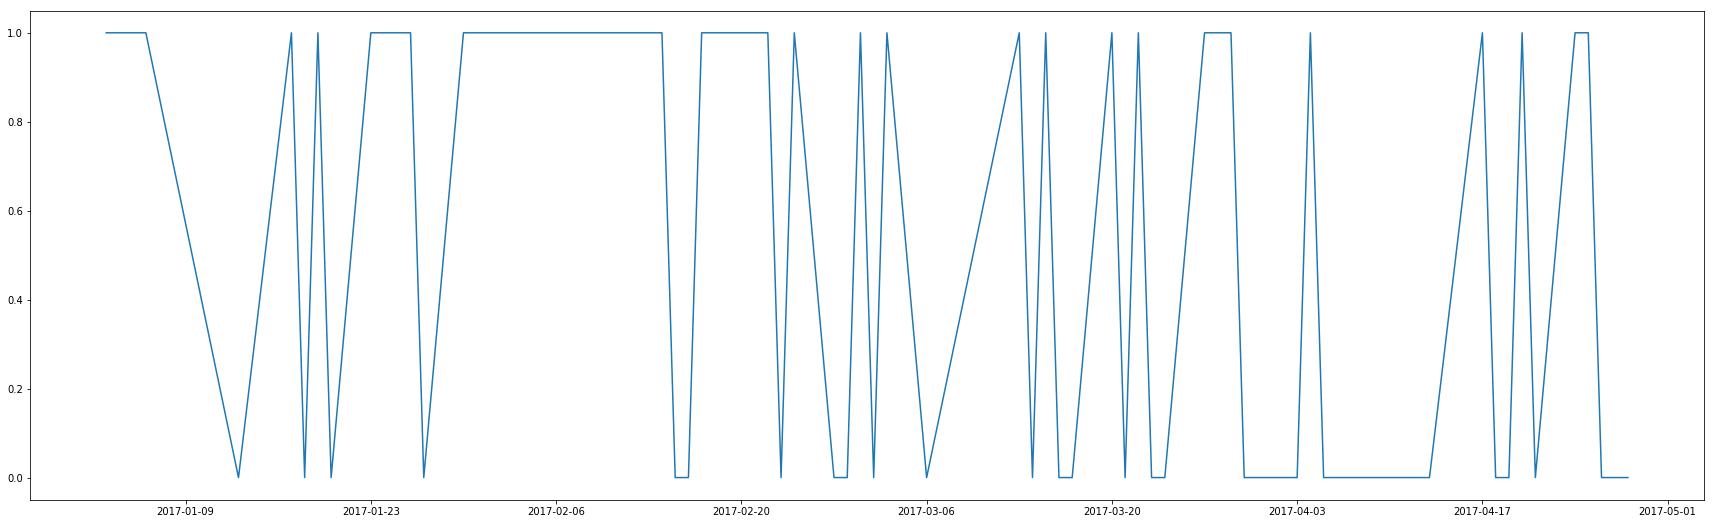

[30.0, 9.0]
[30, 9]


In [14]:
plt.plot(df['Date'], df['return'])
plt.show()
plt.plot(df['Date'], df['predicted'])
fig_size = plt.rcParams["figure.figsize"]
print(fig_size)
fig_size[0] = 30
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size
print(fig_size)

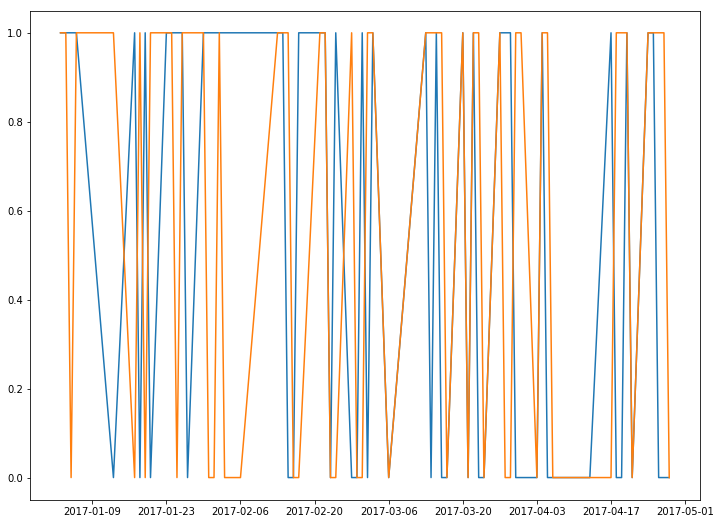

In [10]:
plt.show()

In [20]:
counter = 0
for i in range(len(df)):
    if(df.iloc[i]['return'] == df.iloc[i]['predicted']):
        counter = counter + 1
match = (counter/len(df))*100


In [21]:
print(match)

52.307692307692314
